# **1. a. Data Generation - Option 3**

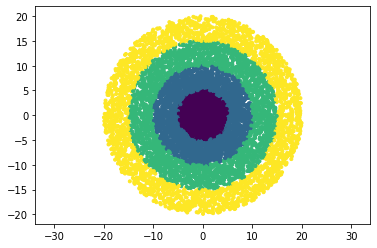

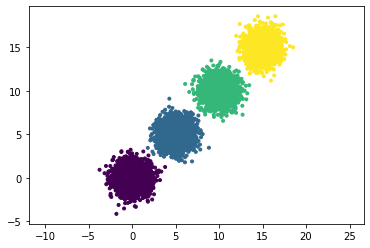

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def generateData(numExamples, distributionShape, noise=0, numClasses=2, numOutputs=1):
  sample_size = numExamples
  class_labels = []
  class_lab =[]
  test = np.zeros((sample_size, numClasses))
  for i in range(numClasses):
      for j in range(int(sample_size/numClasses)):
        class_labels.append(abs(i))
        class_lab.append((abs(i)))


  if distributionShape == 'g':
    classes = None
    for i in range(numClasses):
      mean = [i*5, i*5]
      cov = [[1, 0], [0, 1]]
      class_data = np.random.multivariate_normal(mean, cov, int(sample_size/numClasses)).T
      class_data = np.concatenate((class_data[0].reshape(-1, 1), class_data[1].reshape(-1, 1)), axis=1)
      if classes is None:
        classes = class_data
      else:
        classes = np.concatenate((classes, class_data), axis=0)

  if distributionShape == 'c':
    classes = None
    for i in range(numClasses):
      linspace = np.linspace(0, 2 * np.pi, int(sample_size/numClasses))
      r = np.random.uniform(i*5, (i+1)*5, size=int(sample_size/numClasses))
      x = (np.cos(linspace) * r).reshape(-1, 1)
      y = (np.sin(linspace) * r).reshape(-1, 1)
      xy = np.concatenate((x, y), axis=1)
      if classes is None:
        classes = xy
      else:
        classes = np.concatenate((classes, xy), axis=0)
  classes = np.concatenate((classes, np.full((len(classes),1), 1)), axis=1)
  data_generated = np.concatenate((classes, np.asarray(class_lab).reshape(-1, 1)), axis=1)
  if numOutputs == numClasses:
    labels = data_generated[:, -1].astype('int')
    class_labels = np.zeros((data_generated.shape[0], numClasses))

    class_labels[np.arange(labels.size), labels] = 1
    data_generated = data_generated[:, :-1]
    data_generated = np.concatenate((classes, np.asarray(class_labels)), axis=1)

    data_generated = np.concatenate((data_generated, np.asarray(class_lab).reshape(-1, 1)), axis=1)

  np.random.shuffle(data_generated)
  if noise != 0:
    np.random.shuffle(data_generated)
    for i in range(int(sample_size*noise/100)):
      data_generated[:, -1][i] = np.random.randint(0, numClasses)    

  np.random.shuffle(data_generated)
  plt.scatter(data_generated[:, 0], data_generated[:, 1], c = data_generated[:, -1], marker='.')
  plt.axis('equal')
  plt.show()
  return data_generated

X = generateData(10000, 'c', 0, 4)
X = generateData(10000, 'g', 0, 4)


# **1. b. Adding Noise**

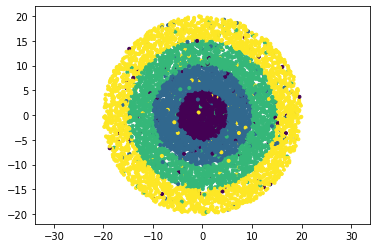

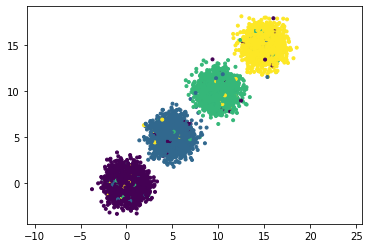

In [0]:
X = generateData(10000, 'c', 5, 4)
X = generateData(10000, 'g', 5, 4)

<div class="alert-info">

1a: 3/3

1b: 1/1

Great job!
</div>

# **1. c. Simple neural network**

In [0]:
def activation(X, activationType):
  if activationType == 'S':
    return 1/(1+np.exp(-X))
  if activationType == 'L':
    return X
  if activationType == 'R':
    X = np.where(X>0, X, 0)
    return X
  if activationType == 'softmax':
    exp = np.exp(X - np.max(X))
    return exp/np.sum(exp, axis=1, keepdims=True)
def derivatives(X, activationType):
  if activationType == 'S':
    return X*(1-X)
  if activationType == 'L':
    return 1
  if activationType == 'R':
    X = np.where(X>0, X, 0)
    X = np.where(X<0, X, 1)
    return X

def train(X, numInput, numHiddenUnits, numOutput, activationType, numIter, numHiddenLayers):
  if numOutput > 1:
    t = (X[:, numInput+1:-1])
    numOutput = t.shape[1]
  else:
    t = X[:, -1].reshape(-1, 1)
  lr = 0.0018
  if activationType != 'S':
    lr = 0.000018

  X = X[:, :numInput+1]
  W1 = 2*np.random.random((numInput+1, numHiddenUnits)) - 1
  W2 = 2*np.random.random((numHiddenUnits, numOutput)) - 1
  for j in range(numIter):
    h = activation(np.dot(X, W1), activationType)
    y = activation(np.dot(h, W2), activationType)
    y_delta = (t-y) * derivatives(y, activationType)
    h_delta = np.dot(y_delta, W2.T) * derivatives(h, activationType)
    W2 += lr*(np.dot(h.T, y_delta))
    W1 += lr*(np.dot(X.T, h_delta))

  return W1, W2, t
def predict(x, W1, W2, numInput, numHiddenUnits, numOutput, activationType, verbosity=0, numHiddenLayers=0):
  if numOutput != 1:
    t = (x[:, numInput+1:-1])
  else:
    t = x[:, -1].reshape(-1, 1)
  x = x[:, :numInput+1]
  if numOutput == 1:
    activationType = 'S'
  else:
    activationType = 'softmax'
  
  z1 = np.dot(x,W1)
  h = activation(z1, activationType)
  z2 = np.dot(h,W2)

  y = activation(z2, activationType)
  if numOutput != 1:
    for i in range(len(y)):
      for j in range(len(y[i])):
        if y[i][j] == max(y[i]):
          y[i][j] = 1
  # print(y)
  return abs(np.round(y)), t

X_train = generateData(1000, 'g', 0, 2, 1)
W1, W2, t = train(X_train, 2, 4, 1, 'S', 10000, 1)
X_test = generateData(10000, 'g', 0, 2, 1)
ann_output, t = predict(X_test, W1, W2, 2, 4, 1, 'S', 0)
accuracy = np.sum((ann_output == t).all(1))/t.shape[0]
print("Accuracy is: ", accuracy*100)

Accuracy is:  99.96000000000001


<div class="alert-info">

1c: 7/7

Very good. Code is clean and efficient.
</div>

# **1. d. Implementing neural net with OOP**

Train Data 



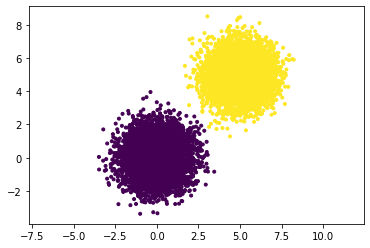

[[73022.36467684606, 3243.762695699921], [73022.36450433207, 3243.7626609875547], [73022.36433181698, 3243.7626262742183], [73022.36415930073, 3243.7625915599124], [73022.3639867834, 3243.7625568446365], [73022.36381426491, 3243.7625221283897], [73022.36364174532, 3243.7624874111743], [73022.3634692246, 3243.762452692988], [73022.36329670275, 3243.7624179738323], [73022.3631241798, 3243.7623832537056], [73022.36295165571, 3243.7623485326094], [73022.36277913052, 3243.7623138105428], [73022.3626066042, 3243.7622790875066], [73022.36243407676, 3243.7622443634996], [73022.3622615482, 3243.7622096385226], [73022.36208901854, 3243.7621749125756], [73022.36191648773, 3243.7621401856577], [73022.36174395586, 3243.7621054577703], [73022.36157142284, 3243.762070728912], [73022.3613988887, 3243.762035999084], [73022.36122635345, 3243.762001268285], [73022.36105381709, 3243.7619665365164], [73022.36088127962, 3243.761931803777], [73022.36070874103, 3243.761897070067], [73022.36053620135, 3243.761

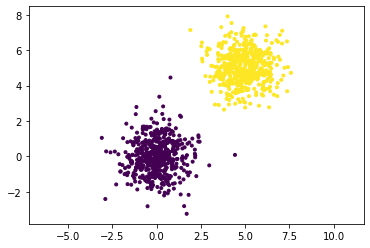

[[2.29631124e-03 1.82560534e-02 0.00000000e+00]
 [1.00000000e-02 5.49951271e-03 0.00000000e+00]
 [3.06804768e-02 8.54221160e-02 5.94427901e+00]
 ...
 [4.08938125e-03 1.00365962e-02 0.00000000e+00]
 [2.80659044e-02 8.03561290e-02 6.09448672e+00]
 [6.19131534e-03 2.46615090e-02 0.00000000e+00]]


In [0]:
class Model:
  def __init__(self, numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='R'):
    self.numInputs = numInputs
    self.numOutputs = numOutputs
    self.layerSize = layerSize
    self.numHiddenLayers = numHiddenLayers
    self.activationType = activationType
    self.weights = []
    self.W1 = []
    self.W2 = []
    self.X_train = None
    self.X_test = None

  def initWeights(self, mean, stdDev):
    self.weights.append(stdDev * np.random.random((self.numInputs+1, self.layerSize)) + mean)
    for _ in range(self.numHiddenLayers-1):
      self.weights.append(stdDev * np.random.random((self.layerSize, self.layerSize)) + mean)
    self.weights.append(stdDev * np.random.random((self.layerSize, self.numOutputs)) + mean)

  def setInput(self, X_train):
    self.X_train = X_train

  def setTest(self, X_test):
    self.X_test = X_test

  def activation(self, X):
    X = np.clip(X, -100, 100)
    if self.activationType == 'S':
      return 1/(1+np.exp(-X))
    if self.activationType == 'L':
      return X
    if self.activationType == 'R':
      X = np.where(X>0, X, 0)
      return X
    if self.activationType == 'softmax':
      exp = np.exp(X - np.max(X))
      return exp/np.sum(exp, axis=1, keepdims=True)
  def derivatives(self, X):
    X = np.clip(X, -100, 100)
    if self.activationType == 'S':
      return X*(1-X)
    if self.activationType == 'L' or self.activationType == 'softmax':
      return 1
    if self.activationType == 'R':
      X = np.where(X>0, X, 0)
      X = np.where(X<0, X, 1)
      return X

  def train(self, numIter, stepSize):
    if self.numOutputs > 1:
      t = (self.X_train[:, self.numInputs+1:-1])
    else:
      t = self.X_train[:, -1].reshape(-1, 1)
    self.X_train = self.X_train[:, :self.numInputs+1]

    if len(self.weights) == 0:
      self.initWeights(-1, 2)
    errors = []
    for i in range(numIter):
      forwardPass = []
      backwardPass = []
      forwardPass.append(self.activation(np.dot(self.X_train, self.weights[0])))
      for j in range(self.numHiddenLayers-1):
        forwardPass.append(self.activation(np.dot(forwardPass[-1], self.weights[j+1])))
      temp_activationType = self.activationType
      if self.numOutputs > 1:
        self.activationType = 'softmax'
      else:
        self.activationType = 'S'
      self.activationType = temp_activationType
      forwardPass.append(self.activation(np.dot(forwardPass[-1], self.weights[-1])))
      if self.numOutputs > 1:
        self.activationType = 'softmax'
      else:
        self.activationType = 'S'
      backwardPass.append((t-forwardPass[-1]) * self.derivatives(forwardPass[-1]))
      self.activationType = temp_activationType
      for k in range(self.numHiddenLayers-1):
        backwardPass.append(np.dot(backwardPass[-1], self.weights[-(k+1)].T)* self.derivatives(forwardPass[-(k+2)]))

      backwardPass.append(np.dot(backwardPass[-1], self.weights[1].T) * self.derivatives(forwardPass[0]))

      for i in range(self.numHiddenLayers):
        self.weights[-(i+1)] += stepSize*np.dot(forwardPass[i].T, backwardPass[i])
      self.weights[0] += stepSize*np.dot(self.X_train.T, backwardPass[-1])


      iter_error = []
      temp_test = self.X_test
      self.setTest(self.X_train)
      iter_error.append(self.test())
      self.X_test = temp_test
      self.setTest(self.X_test)
      iter_error.append(self.test())
      errors.append(iter_error)
    return errors

  def predict(self, X):
      temp_test_data = self.X_test
      self.setTest(X)
      self.test()
      self.setTest(temp_test_data)
      return self.predictions
  
  def setWeights(self, value):
    return

  def test(self):
    data = self.X_test[:, :self.numInputs+1]
    targets = self.X_test[:, -self.numOutputs:]
    z = np.dot(data, self.weights[0])
    h = self.activation(z)
    for i in range(self.numHiddenLayers):
      z = np.dot(h, self.weights[i+1])
      shp = z.shape
      if self.numOutputs > 1:
        z = z.reshape(1,-1)
        h = self.activation(z)
        h = h.reshape(shp)
    predicted_values = h
    predicted_values = np.where(predicted_values != 0, predicted_values, 0.01)
    cross_entropy = -1* np.sum(np.log(predicted_values) * targets,axis=1,keepdims=True)
    if self.numOutputs == 1:
      predicted_values = predicted_values[:, :2]
    self.predictions = np.concatenate((predicted_values, np.abs(cross_entropy)), axis=1)
    return np.sum(cross_entropy[:,0])

print('Train Data \n')
X = generateData(10000, 'g' , 0, 2, 1)
np.random.shuffle(X)
X_train = X[:9000]
X_test = X[9000:]

net = Model()
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
errors = net.train(10000, 0.0001)
print(errors, '\n \n \n')
print("Test Data \n")
X = generateData(1000, 'g' , 0, 2, 1)

predictions = net.predict(X)
print(predictions)


<div class="alert-info">

1d: 5/5

Very good work. Please next time include outputs that demonstrate the effectiveness or your network - I tested this myself and your network works great, but would save me some time in the future! ie. I can see that your network is outputting predictions, but next time compare those predictions with the actual labels and see what percentage your network gets correct!
</div>

# **1. e. Allow variable number of hidden units**

Train Data 



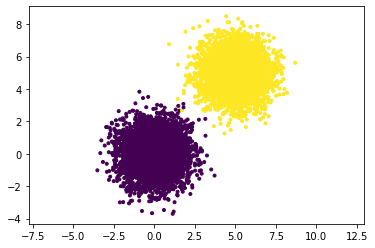

Train and Test Error 
 [[176683.28448268655, 7268.769793010094], [176683.24247676373, 7268.762126031809], [176683.2006259893, 7268.75445665547], [176683.15893240148, 7268.7467848803135], [176683.11739810498, 7268.739110705575], [176683.07602527348, 7268.731434130492], [176683.0348161523, 7268.7237551543], [176682.9937730608, 7268.716073776237], [176682.95289839557, 7268.708389995537], [176682.912194633, 7268.700703811435], [176682.87166433295, 7268.693015223169], [176682.83131014157, 7268.685324229971], [176682.79113479512, 7268.677630831078], [176682.75114112344, 7268.669935025723], [176682.71133205417, 7268.662236813141], [176682.67171061656, 7268.654536192567], [176682.63227994606, 7268.646833163231], [176682.59304328897, 7268.639127724372], [176682.55400400716, 7268.631419875219], [176682.5151655833, 7268.623709615007], [176682.4765316267, 7268.615996942968], [176682.43810587862, 7268.608281858334], [176682.3998922191, 7268.6005643603385], [176682.36189467294, 7268.592844448212], [

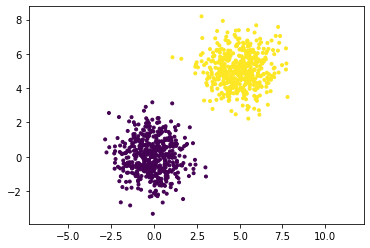

Predictions 
 [[5.90425608e-02 4.27774221e-02 1.38795516e+01]
 [7.56325641e-02 5.41166620e-02 1.27333164e+01]
 [5.68056671e-02 4.12429009e-02 1.40566035e+01]
 ...
 [1.00000000e-02 1.71200204e-03 0.00000000e+00]
 [1.00000000e-02 1.51268106e-03 0.00000000e+00]
 [1.00000000e-02 1.00000000e-02 0.00000000e+00]]


In [0]:
print('Train Data \n')
X = generateData(10000, 'g' , 0, 2, 1)
np.random.shuffle(X)
X_train = X[:9000]
X_test = X[9000:]

net = Model(2,1,5,2,'R')

net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
errors = net.train(10000, 0.0001)
print('Train and Test Error', '\n', errors, '\n\n')
print('Test Data\n')
X = generateData(1000, 'g' , 0, 2, 1)

predictions = net.predict(X)
print('Predictions', '\n', predictions)

# **1. f. Allow various activation types**

Train Data 



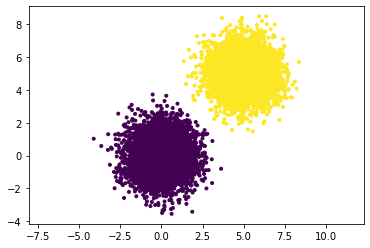

Train and Test Error 
 [[12112.472993267453, 651.5373360160128], [12112.426977464536, 651.5322144740114], [12112.374524354342, 651.5263763569682], [12112.31584178541, 651.5198447770778], [12112.251131558107, 651.5126421754255], [12112.180589642427, 651.5047903460899], [12112.10440638365, 651.4963104588988], [12112.022766696819, 651.4872230809528], [12111.935850250971, 651.4775481970171], [12111.843831644019, 651.4673052288734], [12111.746880568935, 651.45651305372], [12111.645161972001, 651.4451900216874], [12111.538836203716, 651.433353972546], [12111.428059162889, 651.4210222516613], [12111.312982434481, 651.4082117252566], [12111.193753421592, 651.3949387950308], [12111.07051547205, 651.3812194121792], [12110.943407999961, 651.3670690908581], [12110.81256660255, 651.3525029211282], [12110.678123172615, 651.3375355814164], [12110.540206006888, 651.3221813505214], [12110.3989399105, 651.3064541191932], [12110.254446297859, 651.2903674013141], [12110.10684329008, 651.2739343446998], [1

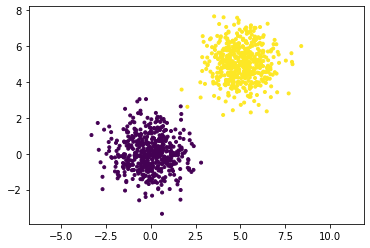

Predictions 
 [[0.50266003 0.49610861 1.38880163]
 [0.50315621 0.49882996 1.38234462]
 [0.50165536 0.50193156 0.        ]
 ...
 [0.50161712 0.5030162  0.        ]
 [0.50163617 0.50058357 0.        ]
 [0.50023623 0.4986666  0.        ]]


In [0]:
print('Train Data \n')
X = generateData(10000, 'g' , 0, 2, 1)
np.random.shuffle(X)
X_train = X[:9000]
X_test = X[9000:]

net = Model(2,1,2,2,'S')

net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
errors = net.train(10000, 0.0001)
print('Train and Test Error', '\n', errors, '\n\n')
print('Test Data\n')
X = generateData(1000, 'g' , 0, 2, 1)

predictions = net.predict(X)
print('Predictions', '\n', predictions)

# **1. g. Allow multiple output units**

Train Data 



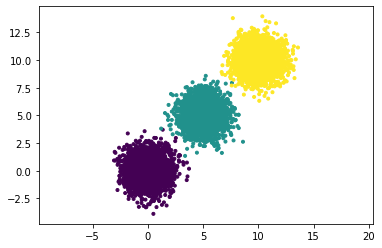

Train and Test Error 
 [[72653.22651108925, 1186.4965673241472], [76369.52514893212, 1244.5350099237385], [79788.44473130895, 1297.8433864430453], [82933.71563933343, 1346.73558665276], [85831.10758118148, 1391.4593056513627], [88507.77000414702, 1432.211329561138], [90990.23867784982, 1469.149336121976], [93302.6297353693, 1502.404322869902], [95465.55618369178, 1532.0940051736661], [97495.7860723641, 1558.3358681610307], [99406.43998463807, 1581.2581898890824], [101207.47395543366, 1601.007813510231], [102906.23310929889, 1617.7542850221669], [104507.94284859825, 1631.6907585134395], [106016.09401922236, 1643.032496038155], [107432.74965420064, 1652.0137717056778], [108758.83654938282, 1658.883669924634], [109994.48044854563, 1663.9009096846705], [111139.40795621811, 1667.3276727359298], [112193.3911291121, 1669.4225595278058], [113156.674703213, 1670.4331446064293], [114030.31647559456, 1670.588925829135], [114816.38964856672, 1670.0955505581499], [115518.0303026781, 1669.1309942919

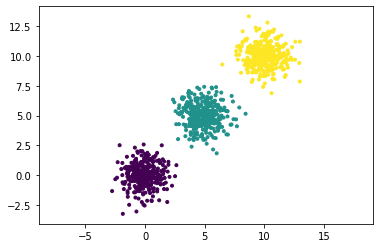

Predictions 
 [[0.33297217 0.3346434  0.33264032 0.        ]
 [0.33277683 0.33444981 0.33244497 3.2978303 ]
 [0.3327509  0.33442411 0.33241903 3.29806323]
 ...
 [0.33286795 0.33454011 0.33253608 2.20101631]
 [0.33294802 0.33461946 0.33261617 0.        ]
 [0.33278109 0.33445403 0.33244922 3.29779216]]


In [0]:
print('Train Data \n')
X = generateData(10000, 'g' , 0, 3, 3)
np.random.shuffle(X)
X_train = X[:9000]
X_test = X[9000:]

net = Model(2,3,2,2,'S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
errors = net.train(10000, 0.0001)
print('Train and Test Error', '\n', errors, '\n\n')
print('Test Data\n')
X = generateData(1000, 'g' , 0, 3, 3)

predictions = net.predict(X)
print('Predictions', '\n', predictions)

# **1. h. Allow multiple hidden layers**

Train Data 



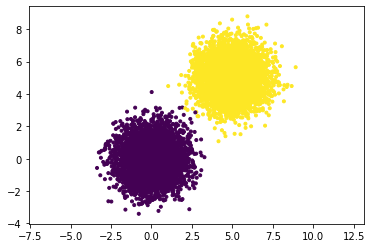

Train and Test Error 
 [[72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.7991819865188], [72524.69384233086, 2931.79918198

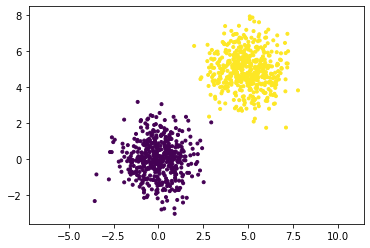

Predictions 
 [[0.01       0.01       0.        ]
 [0.01691678 0.01133555 0.        ]
 [0.0105098  0.0056242  0.        ]
 ...
 [0.01697866 0.01090394 0.        ]
 [0.00923697 0.0030828  0.        ]
 [0.0098105  0.00429399 0.        ]]


In [0]:
print('Train Data \n')
X = generateData(10000, 'g' , 0, 2, 1)
np.random.shuffle(X)
X_train = X[:9000]
X_test = X[9000:]

net = Model(2,1,2,5,'R')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
errors = net.train(10000, 0.0001)
print('Train and Test Error', '\n', errors, '\n\n')
print('Test Data\n')
X = generateData(1000, 'g' , 0, 2, 1)

predictions = net.predict(X)
print('Predictions', '\n', predictions)

<div class="alert-info">

1e: 1/1

1f: 1/1

1g: 1/1

1h: 1/1

</div>

# **References**

[random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

[arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)

[numpy where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)

[concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

[multivariate normal](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html)

[mesh grid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

[scatterplot](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-scatterplots/a/scatterplots-and-correlation-review)


[shuffle](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html)


[sort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html)

